# Advanced Data Science Capstone Project


## Hasthag categorization through NLP


## Objective:


### The final deliverables of this model are:
### 1- categorize hashtags pulled from twitter into categories ( politics, sports, Local affairs, Invoirnment, beauty etc) ==> Category
### 2- Label each tweet whether it is sexist/ racist or not ==> Label

### Importing initial libraries 

In [76]:
import numpy as np
np.random.seed(17)
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten, Input,LSTM,SpatialDropout1D
import re    # for regular expressions 
import nltk  # for text manipulation 
import string 
import warnings 
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns 
import matplotlib.pyplot as plt  
!pip install wordcloud
!pip install wordcloud-fa


  Using cached https://files.pythonhosted.org/packages/7b/f3/1017ea53d88cf39cc06139be4e021d99e3972d6cf635c8598c4cbecbbed0/wordcloud-1.6.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/10/5c/0e94e689de2476c4c5e644a3bd223a1c1b9e2bdb7c510191750be74fa786/Pillow-6.2.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d2/ab/43e678759326f728de861edbef34b8e2ad1b1490505f20e0d1f0716c3bf4/numpy-1.17.4-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/4e/11/06958a2b895a3853206dea1fb2a5b11bf044f626f90745987612af9c8f2c/matplotlib-3.1.2-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl

### Loading files

In [3]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_ff90416a647f4edcb452cb18e7e7b4e7 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='DvyayH2zKeQxkQQijXtziBw7xHg_G4KkkbkFIN6AEyip',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_ff90416a647f4edcb452cb18e7e7b4e7.get_object(Bucket='ads4capstoneproject-donotdelete-pr-fpi0wexefp23vb',Key='hashtags_train.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

train1 = pd.read_excel(body)
train1.head()


,Name,Category,Label,Tweet Volume,Url,Tweet1,Tweet2,Tweet3,Tweet4,Tweet5,Tweet6,Tweet7,Tweet8,Tweet9,Tweet10,Country1,Country2,Country3,Country4,Country5
0,#Absolutely,11,0,319922,http://twitter.com/search?q=Absolutely,RT @joncoopertweets: Coming as a surprise to a...,RT @Stuart_McDonald: Just absolutely disgustin...,RT @nizzaregalado: the worst part about LDRs i...,RT @JuddLegum: 4. The reach of this Ukrainian ...,RT @shambhav15: Whatever the hell you think of...,RT @notshayn: my crush doing absolutely nothin...,Is digital health in an investment bubble? Abs...,@milwaukeemauler Absolutely! He was in everyth...,Folk are allowed to be upset about missing the...,RT @YourMateJez: The biggest myth in England r...,Palestinian Territories,Qatar,Oman,Iraq,NaN
1,#Arab,15,1,46283,http://twitter.com/search?q=arab,RT @printpuncakalam: دعم الحسابات الراقية فقط....,Si no pudísteis asistir a la jornada informati...,"RT @TWICETrends: TWICE ""Feel Special"" M/V TEAS...",RT @ThornThornhill: Israel voters kick Netanya...,RT @printpuncakalam: CC Arab: Quality Print &a...,RT @ThornThornhill: Israel voters kick Netanya...,RT @1milcoupe: I’m gonna date a Turkish girl t...,RT @AlArabiya: نيويورك بوست: الشيء الذي ينبغي ...,بلاغ رسمي يتهم &amp;#8221;الجزيرة&amp;#8220; ا...,RT @JFXM: Big news breaking from Israel. The J...,Qatar,Bahrain,Jordan,Palestinian Territories,NaN
2,#Palestinians,11,1,29757,http://twitter.com/search?q=%23palestinians,RT @ShehabAgencyEn: 🇵🇸#Palestine : About 25 Pa...,"RT @wavesandnumb3rs: Collectively, across Pale...",#BDS #Gaza #Palestinians #HumanRights #Palesti...,RT @ShehabAgencyEn: From the clashes that brok...,RT @NetworkCanada: VIDEO: Today members of Dis...,"RT @JVoiceLabour: ""In Area C Israeli authoriti...",@jamalblogs @NickKristof @monaeltahawy @Martin...,@shahadwest @UBAsleep Yessss and us Palestinia...,@ItmakesSNS tries to address following anti-Mu...,"RT @abierkhatib: It’s 2019, 72 years since the...",Jordan,Palestinian Territories,Iraq,NaN,NaN
3,#Middle East,11,0,34837,http://twitter.com/search?q=%22Middle+East%22,RT @afzaque: Thomas Cook began leading tour gr...,RT @takeshisakuragi: 2012年10月、アレッポの病院を訪れたとき、途切...,RT @davidfrawleyved: India through @narendramo...,RT @BoxingLifeLong: @nina14p @boxersforlife Cl...,RT @Scr0dman: @american4117 @Diffdrum1 @MSNBC ...,Times of Middle East: Apple Function Liveblog:...,@IDF Ah ah ah here’s an idea...\nhttps://t.co/...,"Even though DP World and the UAE faced off, an...",RT @davidfrawleyved: India through @narendramo...,Watch #Refinitiv's latest Oil Market update an...,Qatar,Palestinian Territories,Jordan,NaN,NaN
4,#Technology,4,0,16613,http://twitter.com/search?q=%23technology,RT @rashtrapatibhvn: The gap between governmen...,RT @AndroidAuth: Huawei clarifies it has “no p...,RT @TW_TradeShow: IMT\nTaiwan’s professional e...,RT @missingpeople: In the age of technology wh...,ADT AS WELL AS PROTEC SYSTEM WITH BLOOD TRACE ...,RT @nizzaregalado: the worst part about LDRs i...,RT @realjimdandie: @DonnaWR8 @ConcernedHigh I ...,RT @ITNewsAfrica: Cisco and SingularityNET set...,Guys it was auto correct...these technology th...,RT @rashtrapatibhvn: The gap between governmen...,Palestinian Territories,United Arab Emirates,NaN,NaN,NaN


In [4]:

body = client_ff90416a647f4edcb452cb18e7e7b4e7.get_object(Bucket='ads4capstoneproject-donotdelete-pr-fpi0wexefp23vb',Key='hashtags_test.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

test1 = pd.read_excel(body)
test1.head()


,Name,Category,Label,Tweet Volume,Url,Tweet1,Tweet2,Tweet3,Tweet4,Tweet5,Tweet6,Tweet7,Tweet8,Tweet9,Tweet10,Country1,Country2,Country3,Country4,Country5
0,#UhOhitsGIDLE,1,0,88803,http://twitter.com/search?q=%23UhOhitsGIDLE,@JoonHeartBeat The fact that the tweet is from...,"@yebinlvr Dreamcatcher the end of nightmare, g...",She didn't even show discrimination and prejud...,The fact that y'all were calling soyeon racist...,RT @yebinlvr: ok im gonna do another ga as a t...,#HappyBirthday to #gidle #yuqi ! The #brightes...,If the said the n word then I'd understand but...,@gidlefriend Ur so damn lucky. I want them to ...,@namgischiId Fr i have screenshots on my ig n ...,RT @GIDLEChartData: 📣 Today is @G_I_DLE’s firs...,Saudi Arabia,NaN,NaN,NaN,NaN
1,#MyLeaderRahulGandhi,14,0,16996,http://twitter.com/search?q=%23MyLeaderRahulGa...,@h_s_Karthik @srinivasiyc @RahulGandhi #MyLead...,"RT @devender_babli: तप, त्याग और बलिदान भट्टी ...",RT @LMLido: @MTulikaa @srinivasiyc @GoSlowplz ...,@srinivasiyc @RahulGandhi #MyLeaderRahulGandhi...,RT @h_s_Karthik: @srinivasiyc @RahulGandhi #My...,RT @h_s_Karthik: While the current @BJP4India ...,@GEORGE52107460 @harmony1960 @Shehla_Rashid #M...,RT @h_s_Karthik: @srinivasiyc @RahulGandhi #My...,@MTulikaa @srinivasiyc @GoSlowplz @RahulGandhi...,@MoeedNj @GVS_News #NotMyPM #EVMSarkar \n\n#M...,Qatar,NaN,NaN,NaN,NaN
2,#WorldDrugDay,15,0,21881,http://twitter.com/search?q=%23WorldDrugDay,RT @PrabhuL30391179: #WorldDrugDay\nमानवता को ...,"RT @AntiDrugRwanda: Nitwa Mpakaniye Ismael, 23...",#WorldDrugDay\nमानवता को पूर्ण रूप से नशीले पद...,RT @devender_babli: स्वस्थ और मजबूत समाज की सं...,"RT @AntiDrugRwanda: I am Odette Nabonibo, one ...",RT @PoonamBhan2: #WorldDrugDay\nमानवता को पूर्...,RT @PoonamBhan2: #WorldDrugDay\nमानवता को पूर्...,#WorldDrugDay\nमानवता को पूर्ण रूप से नशीले पद...,RT @AntiDrugRwanda: My names are Hervé Dushimy...,RT @AntiDrugRwanda: I'm called UMWALI Gemima a...,Qatar,NaN,NaN,NaN,NaN
3,#BRINGTHESOUL_THEMOVIE,6,0,409092,http://twitter.com/search?q=%23BRINGTHESOUL_TH...,RT @bts_bighit: &lt;BRING THE SOUL: THE MOVIE&...,RT @ForeverpurpleV: I can’t wait anymore 💜💜💜#B...,RT @bts_bighit: &lt;BRING THE SOUL: THE MOVIE&...,ขายโปสการ์ด 100฿ รวมส่งลทบค่า อันนี้ที่ได้จากห...,RT @bts_bighit: &lt;BRING THE SOUL: THE MOVIE&...,RT @WeLoveSF: ดูหนังจบ⚠️ เก็บตั๋วไว้ให้ดี #BRI...,RT @bts_bighit: &lt;BRING THE SOUL: THE MOVIE&...,RT @bts_bighit: &lt;BRING THE SOUL: THE MOVIE&...,RT @shopshopnumber1: #พร้อมส่ง *หายาก* 🌈BTS ME...,RT @bts_bighit: &lt;BRING THE SOUL: THE MOVIE&...,Qatar,NaN,NaN,NaN,NaN
4,#MuellerTime,7,0,12040,http://twitter.com/search?q=%23MuellerTime,Arrest them all. No mercy. #ImpeachTheMF #Trum...,RT @RealJamesWoods: #MuellerTime... https://t....,RT @RealJamesWoods: #MuellerTime... https://t....,#PutinsPuppet Arrest them all. No mercy. #Impe...,@PatriotMadd @realDonaldTrump @JoeBiden @Donal...,@MittRomney If TRUMP was accused of what Biden...,RT @RealJamesWoods: #MuellerTime... https://t....,RT @RealJamesWoods: #MuellerTime... https://t....,RT @RealJamesWoods: #MuellerTime... https://t....,@wesgeorgia951 @davidfrum The only thing missi...,Qatar,NaN,NaN,NaN,NaN


In [5]:

body = client_ff90416a647f4edcb452cb18e7e7b4e7.get_object(Bucket='ads4capstoneproject-donotdelete-pr-fpi0wexefp23vb',Key='hashtags_test1.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
#if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

test2 = pd.read_excel(body)
test2


,Name,Category,Label,Tweet Volume,Url,Tweet1,Tweet2,Tweet3,Tweet4,Tweet5,Tweet6,Tweet7,Tweet8,Tweet9,Tweet10,Country1,Country2,Country3,Country4,Country5
0,#UhOhitsGIDLE,1.0,0.0,88803.0,http://twitter.com/search?q=%23UhOhitsGIDLE,@JoonHeartBeat The fact that the tweet is from...,"@yebinlvr Dreamcatcher the end of nightmare, g...",She didn't even show discrimination and prejud...,The fact that y'all were calling soyeon racist...,RT @yebinlvr: ok im gonna do another ga as a t...,#HappyBirthday to #gidle #yuqi ! The #brightes...,If the said the n word then I'd understand but...,@gidlefriend Ur so damn lucky. I want them to ...,@namgischiId Fr i have screenshots on my ig n ...,RT @GIDLEChartData: 📣 Today is @G_I_DLE’s firs...,Saudi Arabia,NaN,NaN,NaN,NaN
1,#MyLeaderRahulGandhi,14.0,0.0,16996.0,http://twitter.com/search?q=%23MyLeaderRahulGa...,@h_s_Karthik @srinivasiyc @RahulGandhi #MyLead...,"RT @devender_babli: तप, त्याग और बलिदान भट्टी ...",RT @LMLido: @MTulikaa @srinivasiyc @GoSlowplz ...,@srinivasiyc @RahulGandhi #MyLeaderRahulGandhi...,RT @h_s_Karthik: @srinivasiyc @RahulGandhi #My...,RT @h_s_Karthik: While the current @BJP4India ...,@GEORGE52107460 @harmony1960 @Shehla_Rashid #M...,RT @h_s_Karthik: @srinivasiyc @RahulGandhi #My...,@MTulikaa @srinivasiyc @GoSlowplz @RahulGandhi...,@MoeedNj @GVS_News #NotMyPM #EVMSarkar \n\n#M...,Qatar,NaN,NaN,NaN,NaN
2,#WorldDrugDay,15.0,0.0,21881.0,http://twitter.com/search?q=%23WorldDrugDay,RT @PrabhuL30391179: #WorldDrugDay\nमानवता को ...,"RT @AntiDrugRwanda: Nitwa Mpakaniye Ismael, 23...",#WorldDrugDay\nमानवता को पूर्ण रूप से नशीले पद...,RT @devender_babli: स्वस्थ और मजबूत समाज की सं...,"RT @AntiDrugRwanda: I am Odette Nabonibo, one ...",RT @PoonamBhan2: #WorldDrugDay\nमानवता को पूर्...,RT @PoonamBhan2: #WorldDrugDay\nमानवता को पूर्...,#WorldDrugDay\nमानवता को पूर्ण रूप से नशीले पद...,RT @AntiDrugRwanda: My names are Hervé Dushimy...,RT @AntiDrugRwanda: I'm called UMWALI Gemima a...,Qatar,NaN,NaN,NaN,NaN
3,#BRINGTHESOUL_THEMOVIE,6.0,0.0,409092.0,http://twitter.com/search?q=%23BRINGTHESOUL_TH...,RT @bts_bighit: &lt;BRING THE SOUL: THE MOVIE&...,RT @ForeverpurpleV: I can’t wait anymore 💜💜💜#B...,RT @bts_bighit: &lt;BRING THE SOUL: THE MOVIE&...,ขายโปสการ์ด 100฿ รวมส่งลทบค่า อันนี้ที่ได้จากห...,RT @bts_bighit: &lt;BRING THE SOUL: THE MOVIE&...,RT @WeLoveSF: ดูหนังจบ⚠️ เก็บตั๋วไว้ให้ดี #BRI...,RT @bts_bighit: &lt;BRING THE SOUL: THE MOVIE&...,RT @bts_bighit: &lt;BRING THE SOUL: THE MOVIE&...,RT @shopshopnumber1: #พร้อมส่ง *หายาก* 🌈BTS ME...,RT @bts_bighit: &lt;BRING THE SOUL: THE MOVIE&...,Qatar,NaN,NaN,NaN,NaN
4,#MuellerTime,7.0,0.0,12040.0,http://twitter.com/search?q=%23MuellerTime,Arrest them all. No mercy. #ImpeachTheMF #Trum...,RT @RealJamesWoods: #MuellerTime... https://t....,RT @RealJamesWoods: #MuellerTime... https://t....,#PutinsPuppet Arrest them all. No mercy. #Impe...,@PatriotMadd @realDonaldTrump @JoeBiden @Donal...,@MittRomney If TRUMP was accused of what Biden...,RT @RealJamesWoods: #MuellerTime... https://t....,RT @RealJamesWoods: #MuellerTime... https://t....,RT @RealJamesWoods: #MuellerTime... https://t....,@wesgeorgia951 @davidfrum The only thing missi...,Qatar,NaN,NaN,NaN,NaN
5,#NeverGiveUpiKON,13.0,0.0,31835.0,http://twitter.com/search?q=%23NeverGiveUpiKON,RT @muayshan0508: ปาอีพีนี้ใส่ot6 stand\n#Unsh...,——KIM HANBIN [ B.I ] 💐🐯\n\nD-11 #iKONpleteMe\n...,ระยะการรอคอย 🐣\n\nD-11:#iKONpleteMe\nD-12:#KON...,RT @yourmydarlin_: ระยะการรอคอย 🐣\n\nD-11:#iKO...,RT @muayshan0508: ปาอีพีนี้ใส่ot6 stand\n#Unsh...,RT @yourmydarlin_: ระยะการรอคอย 🐣\n\nD-11:#iKO...,RT @yourmydarlin_: ระยะการรอคอย 🐣\n\nD-11:#iKO...,RT @yourmydarlin_: ระยะการรอคอย 🐣\n\nD-11:#iKO...,RT @muayshan0508: ปาอีพีนี้ใส่ot6 stand\n#Unsh...,RT @yourmydarlin_: ระยะการรอคอย 🐣\n\nD-11:#iKO...,Qatar,NaN,NaN,NaN,NaN
6,#JusticeForHealth,15.0,0.0,16495.0,http://twitter.com/search?q=%23JusticeForHealth,RT @InsanNeeru2: इंसान मायूस होता है\nकयोकि वो...,RT @pahuja_rinki: Saint Ram Rahim Ji (@Gurmeet...,RT @InsanNeeru2: इंसान 

### Browsing the data and its parameters

In [6]:
train1["Category"].value_counts()

11    35
15    24
13    16
8      6
9      4
5      4
3      3
14     2
6      2
10     1
4      1
1      1
Name: Category, dtype: int64

In [7]:
test1["Category"].value_counts()

15    9
9     6
13    5
14    3
11    3
8     3
12    1
7     1
6     1
1     1
Name: Category, dtype: int64

### Visualising Targets (Category and Label) using Histograms 

/opt/ibm/conda/miniconda3.6/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/ibm/conda/miniconda3.6/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


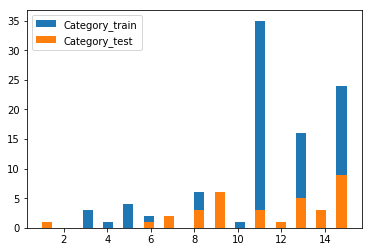

In [8]:
Category_train = train1['Category']#.str.len() 
Category_test = test2['Category']#.str.len() 
plt.hist(Category_train, bins=30, label="Category_train") 
plt.hist(Category_test, bins=30, label="Category_test") 
plt.legend() 
plt.show()

/opt/ibm/conda/miniconda3.6/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/ibm/conda/miniconda3.6/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


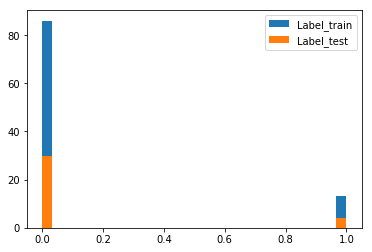

In [9]:
Category_train = train1['Label']#.str.len() 
Category_test = test2['Label']#.str.len() 
plt.hist(Category_train, bins=30, label="Label_train") 
plt.hist(Category_test, bins=30, label="Label_test") 
plt.legend() 
plt.show()

### Combining Both datasets into one for data preprocessing

In [10]:
comb = train1.append(test2, ignore_index=True) 
comb.shape
comb.head()

,Name,Category,Label,Tweet Volume,Url,Tweet1,Tweet2,Tweet3,Tweet4,Tweet5,Tweet6,Tweet7,Tweet8,Tweet9,Tweet10,Country1,Country2,Country3,Country4,Country5
0,#Absolutely,11.0,0.0,319922.0,http://twitter.com/search?q=Absolutely,RT @joncoopertweets: Coming as a surprise to a...,RT @Stuart_McDonald: Just absolutely disgustin...,RT @nizzaregalado: the worst part about LDRs i...,RT @JuddLegum: 4. The reach of this Ukrainian ...,RT @shambhav15: Whatever the hell you think of...,RT @notshayn: my crush doing absolutely nothin...,Is digital health in an investment bubble? Abs...,@milwaukeemauler Absolutely! He was in everyth...,Folk are allowed to be upset about missing the...,RT @YourMateJez: The biggest myth in England r...,Palestinian Territories,Qatar,Oman,Iraq,NaN
1,#Arab,15.0,1.0,46283.0,http://twitter.com/search?q=arab,RT @printpuncakalam: دعم الحسابات الراقية فقط....,Si no pudísteis asistir a la jornada informati...,"RT @TWICETrends: TWICE ""Feel Special"" M/V TEAS...",RT @ThornThornhill: Israel voters kick Netanya...,RT @printpuncakalam: CC Arab: Quality Print &a...,RT @ThornThornhill: Israel voters kick Netanya...,RT @1milcoupe: I’m gonna date a Turkish girl t...,RT @AlArabiya: نيويورك بوست: الشيء الذي ينبغي ...,بلاغ رسمي يتهم &amp;#8221;الجزيرة&amp;#8220; ا...,RT @JFXM: Big news breaking from Israel. The J...,Qatar,Bahrain,Jordan,Palestinian Territories,NaN
2,#Palestinians,11.0,1.0,29757.0,http://twitter.com/search?q=%23palestinians,RT @ShehabAgencyEn: 🇵🇸#Palestine : About 25 Pa...,"RT @wavesandnumb3rs: Collectively, across Pale...",#BDS #Gaza #Palestinians #HumanRights #Palesti...,RT @ShehabAgencyEn: From the clashes that brok...,RT @NetworkCanada: VIDEO: Today members of Dis...,"RT @JVoiceLabour: ""In Area C Israeli authoriti...",@jamalblogs @NickKristof @monaeltahawy @Martin...,@shahadwest @UBAsleep Yessss and us Palestinia...,@ItmakesSNS tries to address following anti-Mu...,"RT @abierkhatib: It’s 2019, 72 years since the...",Jordan,Palestinian Territories,Iraq,NaN,NaN
3,#Middle East,11.0,0.0,34837.0,http://twitter.com/search?q=%22Middle+East%22,RT @afzaque: Thomas Cook began leading tour gr...,RT @takeshisakuragi: 2012年10月、アレッポの病院を訪れたとき、途切...,RT @davidfrawleyved: India through @narendramo...,RT @BoxingLifeLong: @nina14p @boxersforlife Cl...,RT @Scr0dman: @american4117 @Diffdrum1 @MSNBC ...,Times of Middle East: Apple Function Liveblog:...,@IDF Ah ah ah here’s an idea...\nhttps://t.co/...,"Even though DP World and the UAE faced off, an...",RT @davidfrawleyved: India through @narendramo...,Watch #Refinitiv's latest Oil Market update an...,Qatar,Palestinian Territories,Jordan,NaN,NaN
4,#Technology,4.0,0.0,16613.0,http://twitter.com/search?q=%23technology,RT @rashtrapatibhvn: The gap between governmen...,RT @AndroidAuth: Huawei clarifies it has “no p...,RT @TW_TradeShow: IMT\nTaiwan’s professional e...,RT @missingpeople: In the age of technology wh...,ADT AS WELL AS PROTEC SYSTEM WITH BLOOD TRACE ...,RT @nizzaregalado: the worst part about LDRs i...,RT @realjimdandie: @DonnaWR8 @ConcernedHigh I ...,RT @ITNewsAfrica: Cisco and SingularityNET set...,Guys it was auto correct...these technology th...,RT @rashtrapatibhvn: The gap between governmen...,Palestinian Territories,United Arab Emirates,NaN,NaN,NaN


### Rearranging the dataframe, by creating rows for each of the tweets  (Tweet1 ~ Tweet10) and removing the Countries columns

In [11]:
test_combi1 = comb
test_combi1 = test_combi1.drop(["Tweet Volume","Country1","Country2","Country3","Country4","Country5"], axis =1)
d = dict(Tweet=test_combi1.filter(regex="^Tweet").columns)
test = pd.lreshape(test_combi1, d)
test.head()

,Category,Label,Name,Url,Tweet
0,11.0,0.0,#Absolutely,http://twitter.com/search?q=Absolutely,RT @joncoopertweets: Coming as a surprise to a...
1,15.0,1.0,#Arab,http://twitter.com/search?q=arab,RT @printpuncakalam: دعم الحسابات الراقية فقط....
2,11.0,1.0,#Palestinians,http://twitter.com/search?q=%23palestinians,RT @ShehabAgencyEn: 🇵🇸#Palestine : About 25 Pa...
3,11.0,0.0,#Middle East,http://twitter.com/search?q=%22Middle+East%22,RT @afzaque: Thomas Cook began leading tour gr...
4,4.0,0.0,#Technology,http://twitter.com/search?q=%23technology,RT @rashtrapatibhvn: The gap between governmen...


In [12]:
combi = test
combi.head()

,Category,Label,Name,Url,Tweet
0,11.0,0.0,#Absolutely,http://twitter.com/search?q=Absolutely,RT @joncoopertweets: Coming as a surprise to a...
1,15.0,1.0,#Arab,http://twitter.com/search?q=arab,RT @printpuncakalam: دعم الحسابات الراقية فقط....
2,11.0,1.0,#Palestinians,http://twitter.com/search?q=%23palestinians,RT @ShehabAgencyEn: 🇵🇸#Palestine : About 25 Pa...
3,11.0,0.0,#Middle East,http://twitter.com/search?q=%22Middle+East%22,RT @afzaque: Thomas Cook began leading tour gr...
4,4.0,0.0,#Technology,http://twitter.com/search?q=%23technology,RT @rashtrapatibhvn: The gap between governmen...


### Cleansing the data

In [13]:
#Defining Function to remove patterns, punctuations etc
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [14]:
#Removing Handlers
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['Tweet'], "@[\w]*") 
combi.head()

,Category,Label,Name,Url,Tweet,tidy_tweet
0,11.0,0.0,#Absolutely,http://twitter.com/search?q=Absolutely,RT @joncoopertweets: Coming as a surprise to a...,RT : Coming as a surprise to absolutely nobody...
1,15.0,1.0,#Arab,http://twitter.com/search?q=arab,RT @printpuncakalam: دعم الحسابات الراقية فقط....,RT : دعم الحسابات الراقية فقط..ادب~ذوق~اخلاق \...
2,11.0,1.0,#Palestinians,http://twitter.com/search?q=%23palestinians,RT @ShehabAgencyEn: 🇵🇸#Palestine : About 25 Pa...,RT : 🇵🇸#Palestine : About 25 Palestinians were...
3,11.0,0.0,#Middle East,http://twitter.com/search?q=%22Middle+East%22,RT @afzaque: Thomas Cook began leading tour gr...,RT : Thomas Cook began leading tour groups to ...
4,4.0,0.0,#Technology,http://twitter.com/search?q=%23technology,RT @rashtrapatibhvn: The gap between governmen...,RT : The gap between government and people mus...


In [15]:
#Removing Punctuations, Numbers, and Special Characters
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z\u0621-\u064A#]", " ")
#combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[http\S+|www.\S+]"," ") #r'^https?:\/\/.*[\r\n]*
#combi['tidy_tweet'] = combi['tidy_tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("http\S+|www.\S+", " ") 
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("RT", " ") 
combi


,Category,Label,Name,Url,Tweet,tidy_tweet
0,11.0,0.0,#Absolutely,http://twitter.com/search?q=Absolutely,RT @joncoopertweets: Coming as a surprise to a...,Coming surprise absolutely nobody Donald Trump...
1,15.0,1.0,#Arab,http://twitter.com/search?q=arab,RT @printpuncakalam: دعم الحسابات الراقية فقط....,دعم الحسابات الراقية فقط ادب ذوق اخلاق
2,11.0,1.0,#Palestinians,http://twitter.com/search?q=%23palestinians,RT @ShehabAgencyEn: 🇵🇸#Palestine : About 25 Pa...,#Palestine About Palestinians were kidnapped I...
3,11.0,0.0,#Middle East,http://twitter.com/search?q=%22Middle+East%22,RT @afzaque: Thomas Cook began leading tour gr...,Thomas Cook began leading tour groups Egypt an...
4,4.0,0.0,#Technology,http://twitter.com/search?q=%23technology,RT @rashtrapatibhvn: The gap between governmen...,The gap between government and people must You...
5,11.0,1.0,#Pakistan,http://twitter.com/search?q=Pakistan,"Balakot reactivated by #Pakistan, 500 terroris...",Balakot reactivated #Pakistan terrorists waiti...
6,11.0,1.0,#Trump,http://twitter.com/search?q=trump,RT @unscriptedmike: The next time the left cal...,The next time the left calls Trump racist they...
7,15.0,0.0,#FelizLunes,http://twitter.com/search?q=%23FelizLunes,RT @SUUMA_CDMX: ¡Buenos días! #FelizLunes 😁\n\...,Buenos #FelizLunes Ellos son Emilio Angie Emil...
8,15.0,0.0,#Amazing,http://twitter.com/search?q=amazing,PUBLIC SERVICE ANNOUNCEMENT ‼️‼️ THE DEAL TO J...,PUBLIC SERVICE ANNOUNCEMENT THE DEAL JOIN TEAM...
9,11.0,0.0,#علي الاقل,http://twitter.com/search?q=%22%D8%B9%D9%84%D9...,@Almuraqiba ما عرفتش ولكن في نظري لا يجوز استغ...,عرفتش ولكن نظري يجوز استغلال القضية اجل طرح ظر...


In [16]:
# Creating New Column for Arabic tweets
combi['tidy_tweet_ar'] = combi['tidy_tweet'].str.replace("[^\u0621-\u064A#]", " ")
#combi['tidy_tweet_ar'] = combi['tidy_tweet_ar'].str.replace("#", " ")
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

combi.head()

,Category,Label,Name,Url,Tweet,tidy_tweet,tidy_tweet_ar
0,11.0,0.0,#Absolutely,http://twitter.com/search?q=Absolutely,RT @joncoopertweets: Coming as a surprise to a...,Coming surprise absolutely nobody Donald Trump...,...
1,15.0,1.0,#Arab,http://twitter.com/search?q=arab,RT @printpuncakalam: دعم الحسابات الراقية فقط....,,دعم الحسابات الراقية فقط ادب ذوق اخلاق
2,11.0,1.0,#Palestinians,http://twitter.com/search?q=%23palestinians,RT @ShehabAgencyEn: 🇵🇸#Palestine : About 25 Pa...,#Palestine About Palestinians were kidnapped I...,# ...
3,11.0,0.0,#Middle East,http://twitter.com/search?q=%22Middle+East%22,RT @afzaque: Thomas Cook began leading tour gr...,Thomas Cook began leading tour groups Egypt an...,...
4,4.0,0.0,#Technology,http://twitter.com/search?q=%23technology,RT @rashtrapatibhvn: The gap between governmen...,The gap between government and people must You...,...


### Splitting the data frame into two, arabic (combi_ar) and english(combi) dataframes 

In [17]:
# Creating new dataframe for Arabic tweets
combi_ar = combi
combi_ar = combi_ar.drop(["tidy_tweet"], axis =1)
combi_ar['tidy_tweet_ar'] = combi_ar['tidy_tweet_ar'].replace(r'^\s+$', np.nan, regex=True)
combi_ar = combi_ar.dropna(axis =0)
combi_ar.reset_index(drop=True, inplace=True)
combi_ar.head()

,Category,Label,Name,Url,Tweet,tidy_tweet_ar
0,15.0,1.0,#Arab,http://twitter.com/search?q=arab,RT @printpuncakalam: دعم الحسابات الراقية فقط....,دعم الحسابات الراقية فقط ادب ذوق اخلاق
1,11.0,1.0,#Palestinians,http://twitter.com/search?q=%23palestinians,RT @ShehabAgencyEn: 🇵🇸#Palestine : About 25 Pa...,# ...
2,11.0,1.0,#Pakistan,http://twitter.com/search?q=Pakistan,"Balakot reactivated by #Pakistan, 500 terroris...",# ...
3,15.0,0.0,#FelizLunes,http://twitter.com/search?q=%23FelizLunes,RT @SUUMA_CDMX: ¡Buenos días! #FelizLunes 😁\n\...,# ...
4,11.0,0.0,#علي الاقل,http://twitter.com/search?q=%22%D8%B9%D9%84%D9...,@Almuraqiba ما عرفتش ولكن في نظري لا يجوز استغ...,عرفتش ولكن نظري يجوز استغلال القضية اجل طرح ظر...


In [18]:
#removing arabic tweets from the original dataframe along with NaN values
combi = combi.drop(["tidy_tweet_ar"], axis =1)
combi['tidy_tweet'] = combi['tidy_tweet'].replace(r'^\s+$', np.nan, regex=True)
combi = combi.dropna(axis =0)
combi.reset_index(drop=True, inplace=True)
combi.head()

,Category,Label,Name,Url,Tweet,tidy_tweet
0,11.0,0.0,#Absolutely,http://twitter.com/search?q=Absolutely,RT @joncoopertweets: Coming as a surprise to a...,Coming surprise absolutely nobody Donald Trump...
1,11.0,1.0,#Palestinians,http://twitter.com/search?q=%23palestinians,RT @ShehabAgencyEn: 🇵🇸#Palestine : About 25 Pa...,#Palestine About Palestinians were kidnapped I...
2,11.0,0.0,#Middle East,http://twitter.com/search?q=%22Middle+East%22,RT @afzaque: Thomas Cook began leading tour gr...,Thomas Cook began leading tour groups Egypt an...
3,4.0,0.0,#Technology,http://twitter.com/search?q=%23technology,RT @rashtrapatibhvn: The gap between governmen...,The gap between government and people must You...
4,11.0,1.0,#Pakistan,http://twitter.com/search?q=Pakistan,"Balakot reactivated by #Pakistan, 500 terroris...",Balakot reactivated #Pakistan terrorists waiti...


In [19]:
#Removing short words (less than 3 characters)
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combi['tidy_tweet'].head()

0    Coming surprise absolutely nobody Donald Trump...
1    #Palestine About Palestinians were kidnapped I...
2    Thomas Cook began leading tour groups Egypt Ho...
3    between government people must must make best ...
4    Balakot reactivated #Pakistan terrorists waiti...
Name: tidy_tweet, dtype: object

In [20]:
vocab_size = 5000

### Preparing Data for visualizations

In [21]:
# tokenizing
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())  
tokenized_tweet_ar = combi_ar['tidy_tweet_ar'].apply(lambda x: x.split())
tokenized_tweet.head()
tokenized_tweet1 = tokenized_tweet

In [22]:
# stemming arabic and english
import nltk
from nltk.stem import SnowballStemmer
from nltk.stem.porter import * 
from nltk.stem.isri import ISRIStemmer 
#stemmer_en = PorterStemmer() 
#tokenized_tweet1 = tokenized_tweet.apply(lambda x: [stemmer_en.stem(i) for i in x]) 
#tokenized_tweet.head()
stemmer_eng = nltk.stem.SnowballStemmer('english') 
tokenized_tweet1 = tokenized_tweet1.apply(lambda x: [stemmer_eng.stem(i) for i in x]) 
print(tokenized_tweet_ar.head())
print(tokenized_tweet1.head())
stemmer_ar = ISRIStemmer() 
tokenized_tweet_ar = tokenized_tweet_ar.apply(lambda x: [stemmer_ar.stem(i) for i in x])
#tokenized_tweet_ar.head(10)


0       [دعم, الحسابات, الراقية, فقط, ادب, ذوق, اخلاق]
1                                                  [#]
2                                               [#, #]
3                                                  [#]
4    [عرفتش, ولكن, نظري, يجوز, استغلال, القضية, اجل...
Name: tidy_tweet_ar, dtype: object
0    [come, surpris, absolut, nobodi, donald, trump...
1    [#palestin, about, palestinian, were, kidnap, ...
2    [thoma, cook, began, lead, tour, group, egypt,...
3    [between, govern, peopl, must, must, make, bes...
4    [balakot, reactiv, #pakistan, terrorist, wait,...
Name: tidy_tweet, dtype: object


In [23]:
#stitching English tweets text together back again
for i in range(len(tokenized_tweet1)):
    tokenized_tweet1[i] = ' '.join(tokenized_tweet1[i])    
combi['tidy_tweet'] = tokenized_tweet1
combi.head()

,Category,Label,Name,Url,Tweet,tidy_tweet
0,11.0,0.0,#Absolutely,http://twitter.com/search?q=Absolutely,RT @joncoopertweets: Coming as a surprise to a...,come surpris absolut nobodi donald trump perso...
1,11.0,1.0,#Palestinians,http://twitter.com/search?q=%23palestinians,RT @ShehabAgencyEn: 🇵🇸#Palestine : About 25 Pa...,#palestin about palestinian were kidnap isra o...
2,11.0,0.0,#Middle East,http://twitter.com/search?q=%22Middle+East%22,RT @afzaque: Thomas Cook began leading tour gr...,thoma cook began lead tour group egypt holi la...
3,4.0,0.0,#Technology,http://twitter.com/search?q=%23technology,RT @rashtrapatibhvn: The gap between governmen...,between govern peopl must must make best techn...
4,11.0,1.0,#Pakistan,http://twitter.com/search?q=Pakistan,"Balakot reactivated by #Pakistan, 500 terroris...",balakot reactiv #pakistan terrorist wait enter...


In [24]:
#stitching Arabic tweets text together back again
for i in range(len(tokenized_tweet_ar)):
    tokenized_tweet_ar[i] = ' '.join(tokenized_tweet_ar[i])    
combi_ar['tidy_tweet_ar'] = tokenized_tweet_ar
combi_ar.head(30)

,Category,Label,Name,Url,Tweet,tidy_tweet_ar
0,15.0,1.0,#Arab,http://twitter.com/search?q=arab,RT @printpuncakalam: دعم الحسابات الراقية فقط....,دعم حسب رقي فقط ادب ذوق خلق
1,11.0,1.0,#Palestinians,http://twitter.com/search?q=%23palestinians,RT @ShehabAgencyEn: 🇵🇸#Palestine : About 25 Pa...,#
2,11.0,1.0,#Pakistan,http://twitter.com/search?q=Pakistan,"Balakot reactivated by #Pakistan, 500 terroris...",# #
3,15.0,0.0,#FelizLunes,http://twitter.com/search?q=%23FelizLunes,RT @SUUMA_CDMX: ¡Buenos días! #FelizLunes 😁\n\...,#
4,11.0,0.0,#علي الاقل,http://twitter.com/search?q=%22%D8%B9%D9%84%D9...,@Almuraqiba ما عرفتش ولكن في نظري لا يجوز استغ...,عرفتش ولكن نظر يجز غلل قضة اجل طرح ظرف طلب فرض...
5,11.0,1.0,#Iran,http://twitter.com/search?q=Iran,#Britse olietanker Stena Impero na twee maande...,# # #
6,11.0,1.0,#فلسطين,http://twitter.com/search?q=%23%D9%81%D9%84%D8...,RT @Hasan08931491: #FreePalestine 🇵🇸✌\n#FreeGa...,# # # #قروب لسط #القدس عصم لسط بدي #
7,11.0,0.0,#البحرين,http://twitter.com/search?q=%23%D8%A7%D9%84%D8...,كود 💕ThQ211💕الاقوى في ايهيرب\nمكملات\nاعشاب\n...,كود اقى هيرب كمل عشب شوكل حلى برت قهة جنن قمح ...
8,11.0,0.0,#Russian,http://twitter.com/search?q=Russian,@hirofps2 いや無理…笑\n教え子はそれまででいいかな😂😂,
9,11.0,1.0,#مطار_ابها,http://twitter.com/search?q=%23%D9%85%D8%B7%D8...,"RT @spagov: #عاجل_واس \n""#تحالف_دعم_الشرعية_في...",#عجل واس #تحالف دعم شرع يمن هجم رهب ليش حوث ره...


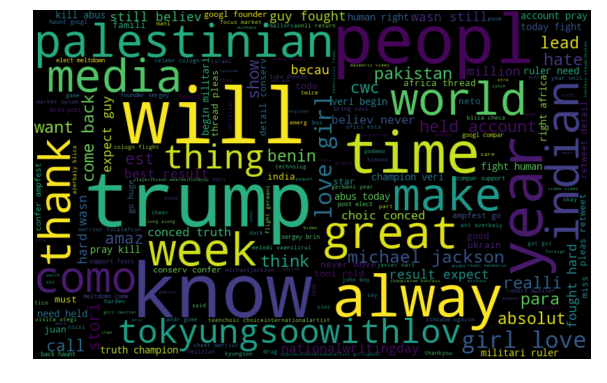

In [25]:
#Vislualising English Tweets using wordcloud

all_words = ' '.join([text for text in combi['tidy_tweet']]) 
from wordcloud import WordCloud 
Wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(Wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

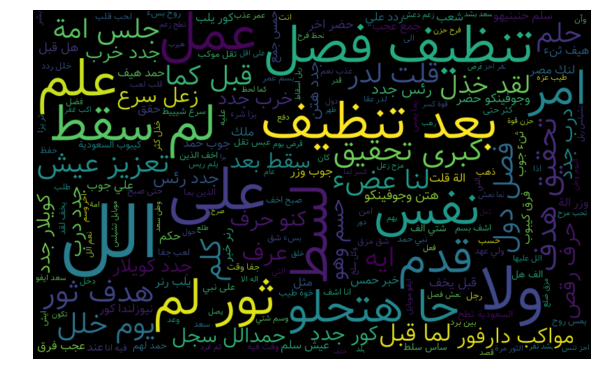

In [26]:
# Visualising Arabic tweets WordCloud
from wordcloud_fa import WordCloudFa
all_words_ar = ' '.join([text for text in combi_ar['tidy_tweet_ar']]) 
all_words_ar

Wordcloud_ar = WordCloudFa(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_ar) 
plt.figure(figsize=(10, 7)) 
plt.imshow(Wordcloud_ar, interpolation="bilinear") 
plt.axis('off') 
plt.show()

In [27]:
# Defining functions to extract any left hashtags from tweets 
def hashtag_extract(x):    
    hashtags = []    # Loop over the words in the tweet    
    for i in x:        
        ht = re.findall(r"#(\w+)", i)        
        hashtags.append(ht)     
    return hashtags

In [28]:
HT_regular = hashtag_extract(combi['tidy_tweet'][combi['Label'] == 0])
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['Label'] == 1])
HT_regular_ar = hashtag_extract(combi_ar['tidy_tweet_ar'][combi_ar['Label'] == 0])
HT_negative_ar = hashtag_extract(combi_ar['tidy_tweet_ar'][combi_ar['Label'] == 1])
print(HT_negative_ar)

[[], [], [], [], ['قروب', 'القدس'], ['عجل', 'تحالف', 'إر', 'مطار'], ['اسقاط'], [], [], [], [], [], ['مطار', 'تر'], [], ['اسقاط'], ['رهف'], [], [], [], [], ['اسقاط'], [], [], [], [], [], ['دم'], ['اسقاط'], [], [], [], [], [], [], ['اسقاط'], [], [], [], [], ['مطار', 'صنعاء'], ['اسقاط'], [], [], [], [], ['السعودية', 'فلسط'], [], [], ['اسقاط'], [], ['أردوغ'], ['بر'], [], [], ['مطار', 'سناب'], ['اسقاط'], ['قطر', 'عزم', 'رهف'], [], [], ['مطار', 'تر'], [], [], ['السعودية', 'فلسط'], ['هئ', 'الحوث'], [], []]


In [29]:
#unnesting list 
HT_regular = sum(HT_regular,[]) 
HT_negative = sum(HT_negative,[])
HT_regular_ar = sum(HT_regular_ar,[]) 
HT_negative_ar = sum(HT_negative_ar,[])

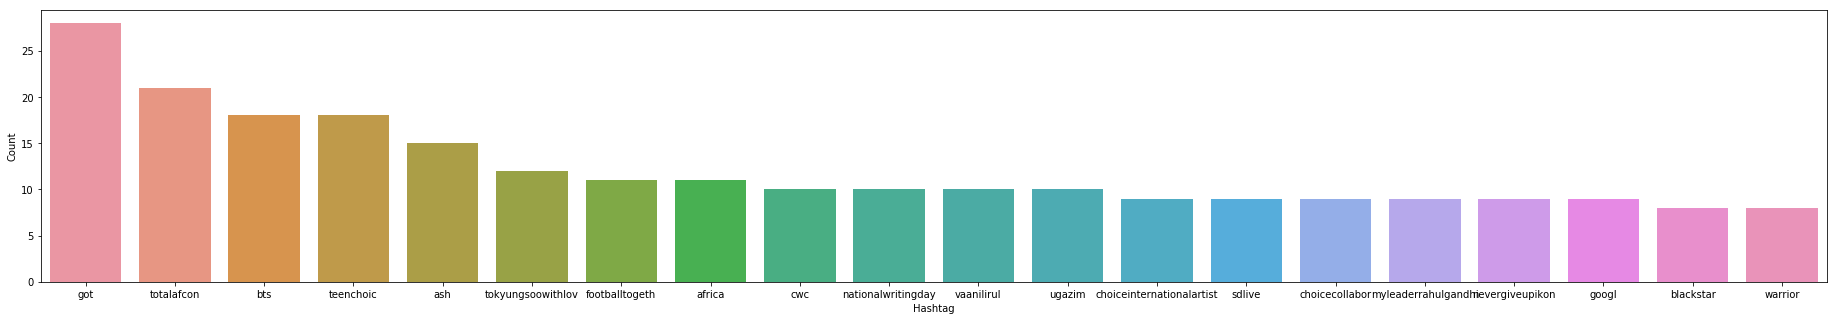

In [30]:
#Visualising En-Hashtags with regular sentiment (non-racist/sexist)
a = nltk.FreqDist(HT_regular) 
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())}) 
# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(32,5)) 
ax = sns.barplot(data=d, x= "Hashtag", y = "Count") 
ax.set(ylabel = 'Count') 
plt.show()

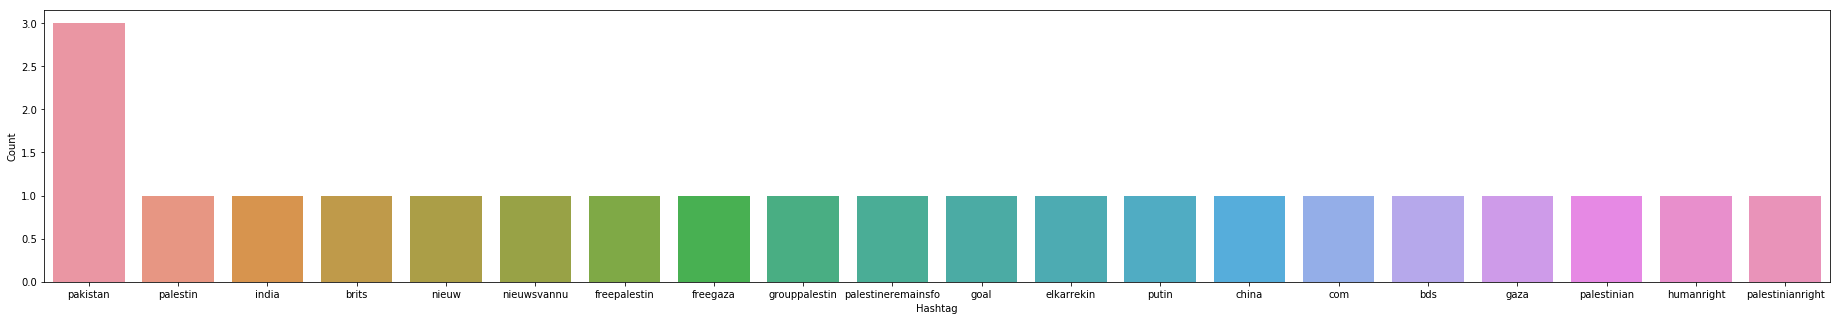

In [31]:
#Visualising En-Hashtags with negative sentiment (racist/sexist)
b = nltk.FreqDist(HT_negative) 
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())}) 
# selecting top 20 most frequent hashtags 
e = e.nlargest(columns="Count", n = 20)   
plt.figure(figsize=(32,5)) 
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count') 
plt.show()

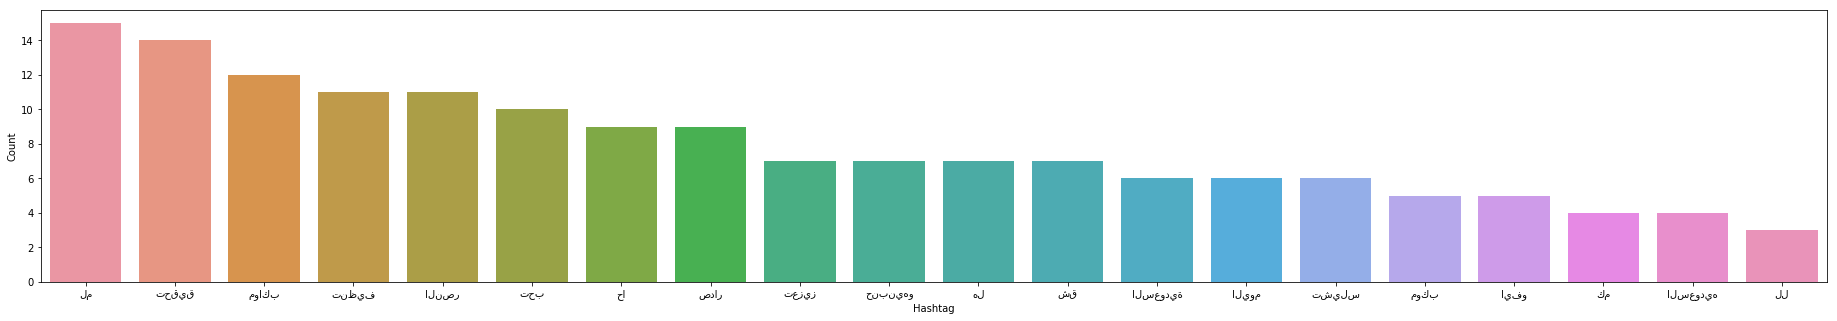

In [32]:
#Visualising Ar-Hashtags with regular sentiment (non-racist/sexist)
a = nltk.FreqDist(HT_regular_ar) 
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())}) 
# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(32,5)) 
ax = sns.barplot(data=d, x= "Hashtag", y = "Count") 
ax.set(ylabel = 'Count') 
plt.show()

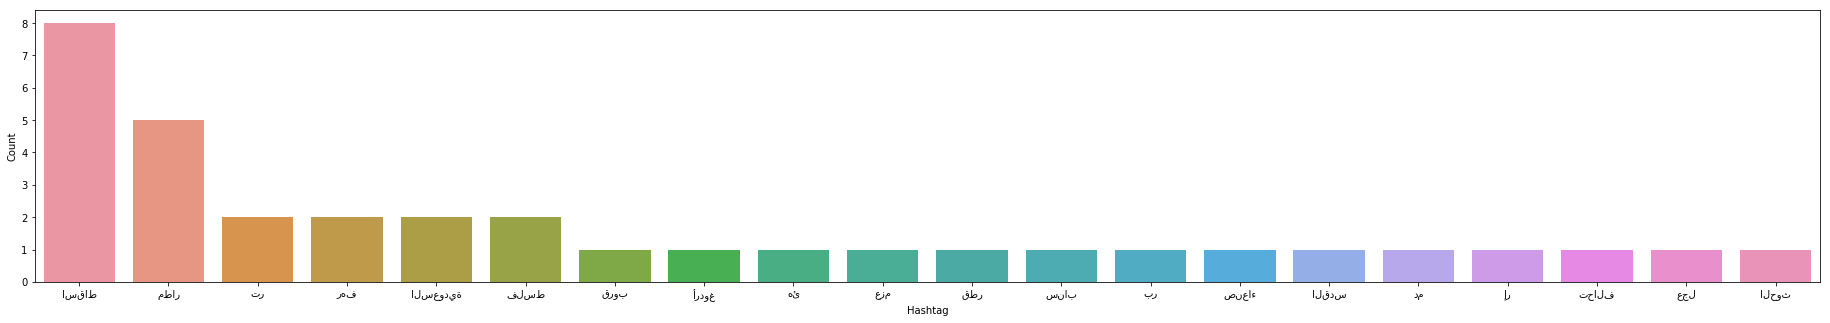

In [33]:
#Visualising Ar-Hashtags with negative sentiment (racist/sexist)
b = nltk.FreqDist(HT_negative_ar) 
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())}) 
# selecting top 20 most frequent hashtags 
e = e.nlargest(columns="Count", n = 20)   
plt.figure(figsize=(32,5)) 
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count') 
plt.show()

### Preparing data for model defining

In [34]:
rt = combi_ar[combi_ar['tidy_tweet_ar'].str.contains("عمل")]
rt

,Category,Label,Name,Url,Tweet,tidy_tweet_ar
35,15.0,0.0,#حلمك_ايه,http://twitter.com/search?q=%23%D8%AD%D9%84%D9...,RT @malk811almanade: عارف تكون داخل كليه لا عم...,عرف تكون دخل كله عمر كانت حلم ولا حبب ولا عرف ...
78,11.0,1.0,#مطار_ابها,http://twitter.com/search?q=%23%D9%85%D8%B7%D8...,RT @Y223TOAWNBS2OX1: #مطار_ابها\n#تركي_الميزان...,#مطار ابه #تر يزا شرء اثث شرك اثث عمل ريض نقل ...
110,11.0,0.0,#السعوديه_تطيح_بزعيم_داعش,http://twitter.com/search?q=%23%D8%A7%D9%84%D8...,RT @a_tabook: #السعودية_تطيح_بزعيم_داعش نجاح ه...,#السعودية تطح زعم دعش نجح هذي عمل يدل هناك عمل...
294,15.0,0.0,#حلمك_ايه,http://twitter.com/search?q=%23%D8%AD%D9%84%D9...,RT @malk811almanade: عارف تكون داخل كليه لا عم...,عرف تكون دخل كله عمر كانت حلم ولا حبب ولا عرف ...
330,11.0,0.0,#البحرين,http://twitter.com/search?q=%23%D8%A7%D9%84%D8...,كود خصم فعال🌹THQ211🌹لمشترياتك في ايهيرب.يخصم ...,كود خصم فعل لمشترياتك هيرب خصم لأل عمل عملاء ج...
346,11.0,0.0,#نناضل_لا_نساوم,http://twitter.com/search?q=%23%D9%86%D9%86%D8...,RT @yswyswysw00yasi: فيديو من مجزرة القيادة ال...,يدو جزر قيد عمة رمض يدو اضح لزم عمل لية رتي فض...
368,11.0,0.0,#السعوديه_تطيح_بزعيم_داعش,http://twitter.com/search?q=%23%D8%A7%D9%84%D8...,RT @a_tabook: #السعودية_تطيح_بزعيم_داعش نجاح ه...,#السعودية تطح زعم دعش نجح هذي عمل يدل هناك عمل...
415,11.0,0.0,#نناضل_لا_نساوم,http://twitter.com/search?q=%23%D9%86%D9%86%D8...,قبل الموكب في جاكسون وناس الجهاز برضو طالعين ...,قبل وكب جكس ونس جهز رضو طلع معا طبنج عمل شغل ع...
491,11.0,0.0,#StandWithSudan,http://twitter.com/search?q=%23standwithsudan,قبل الموكب في جاكسون وناس الجهاز برضو طالعين ...,قبل وكب جكس ونس جهز رضو طلع معا طبنج عمل شغل ع...
537,11.0,0.0,#علي الاقل,http://twitter.com/search?q=%22%D8%B9%D9%84%D9...,RT @tannous_mouawad: هل يعلم السيد حسن نصرالله...,علم سيد حسن صرلل وجد فعل نصف ملي لبن عمل سعد ا...


In [35]:
# Encoding english tweets
encoded_tweet = [one_hot(d, vocab_size) for d in combi['tidy_tweet']]
encoded_tweet

[[1458, 3163, 4553, 2762, 2518, 1862, 2415, 1972, 1788, 1678, 1862, 4620],
 [1791, 3964, 1322, 1233, 4496, 318, 4887, 4555, 2183, 4982, 4660, 1139, 4293],
 [4725, 3729, 2385, 2453, 188, 2341, 3639, 1381, 2797, 1788, 508, 2691, 1192],
 [78, 269, 3917, 905, 905, 334, 2392, 4806, 2905, 1383, 269],
 [1087,
  4979,
  2619,
  4182,
  1133,
  4936,
  1468,
  4530,
  1316,
  2098,
  4553,
  2368,
  1008],
 [4406,
  423,
  1917,
  1493,
  1862,
  1593,
  1878,
  905,
  970,
  353,
  2136,
  3917,
  2726,
  1862,
  440,
  1878],
 [2140, 3681, 4132, 436, 3512, 2827, 2823, 1000, 2367, 4398],
 [3090, 4984, 898, 4859, 476, 2884, 4361, 4675, 2622, 4245, 4062, 3245],
 [2984],
 [296, 1767, 779, 1468, 4496, 4371, 1673, 3836, 2275, 687, 2784, 2558],
 [1322, 767, 865, 1993, 4462, 4168, 3913, 2459, 2578],
 [1788, 2990, 535, 2578, 3575, 2519, 1804, 4942, 1622],
 [4130, 3622, 2468, 2509],
 [4491],
 [3440, 1137, 4592, 4921, 965, 2828, 4290, 4147],
 [],
 [],
 [2392, 1474, 3985, 2099, 1196, 1656, 1189, 1617, 37

In [36]:
#Encoding Arabic tweets
encoded_tweet_ar = [one_hot(d, vocab_size) for d in combi_ar['tidy_tweet_ar']]
encoded_tweet_ar

[[494, 4130, 2880, 3115, 2941, 4199, 2752],
 [],
 [],
 [],
 [1765,
  2378,
  1159,
  2233,
  2288,
  4616,
  3152,
  1232,
  1752,
  4891,
  3963,
  321,
  330,
  2578,
  1355],
 [],
 [3178, 2698, 4528, 550, 2698, 1914],
 [3842,
  4319,
  2746,
  1455,
  3131,
  3070,
  1347,
  2251,
  720,
  4740,
  1184,
  2826,
  2140,
  2245,
  120,
  3842,
  793],
 [],
 [3756,
  2914,
  1943,
  494,
  862,
  276,
  1667,
  2675,
  1657,
  4534,
  2675,
  494,
  223,
  4331,
  4463,
  4223,
  4768],
 [],
 [],
 [],
 [4461,
  846,
  3595,
  1078,
  383,
  4290,
  3690,
  3840,
  1334,
  469,
  2162,
  4851,
  2735,
  1773,
  3638,
  991,
  374,
  3434,
  2071],
 [4868,
  3995,
  1185,
  1223,
  1533,
  2009,
  3717,
  4804,
  45,
  2568,
  1186,
  4544,
  92,
  3249,
  376,
  549],
 [2433,
  4029,
  166,
  2333,
  696,
  4105,
  1238,
  3866,
  2751,
  4699,
  166,
  364,
  2473,
  4467,
  845,
  1410,
  2400,
  3919],
 [],
 [],
 [4157, 734, 2657, 373, 4024, 593, 2999, 973, 4658],
 [64,
  2835,
  862

In [37]:
#padding english tweets
max_len = 512
padded_tweets = pad_sequences(encoded_tweet, maxlen=max_len, padding = 'post')
padded_tweets

array([[1458, 3163, 4553, ...,    0,    0,    0],
       [1791, 3964, 1322, ...,    0,    0,    0],
       [4725, 3729, 2385, ...,    0,    0,    0],
       ...,
       [2950, 1041, 4406, ...,    0,    0,    0],
       [3308, 4224, 4728, ...,    0,    0,    0],
       [4210, 2026,  293, ...,    0,    0,    0]], dtype=int32)

In [38]:
#padding arabic tweets
max_len = 512
padded_tweets_ar = pad_sequences(encoded_tweet_ar, maxlen=max_len, padding = 'post')
padded_tweets_ar

array([[ 494, 4130, 2880, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,    0,    0,    0],
       [4457, 2333, 2897, ...,    0,    0,    0],
       [1717, 2143, 3450, ...,    0,    0,    0]], dtype=int32)

In [39]:
from sklearn.model_selection import train_test_split
#splitting English tweets into train/test
twten_train, twten_test, laben_train, laben_test = train_test_split(padded_tweets,combi['Label'], test_size=0.25, random_state=1000)

In [40]:
#splitting Arabic tweets into train/test
twtar_train, twtar_test, labar_train, labar_test = train_test_split(padded_tweets_ar,combi_ar['Label'], test_size=0.25, random_state=1000)

In [41]:

#Label Prediction model for english tweets
model_en = Sequential()
model_en.add(Embedding(vocab_size , 8 , input_length = max_len)) 
model_en.add(Flatten())
model_en.add(Dense(1, activation='sigmoid'))
# compile the model
model_en.compile(optimizer="adam", loss='binary_crossentropy', metrics=['acc'])
# summarize the model
print(model_en.summary())


Instructions for updating:
Colocations handled automatically by placer.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 512, 8)            40000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4097      
Total params: 44,097
Trainable params: 44,097
Non-trainable params: 0
_________________________________________________________________
None


In [42]:
#Label Prediction model for arabic tweets
model_ar = Sequential()
model_ar.add(Embedding(vocab_size , 8 , input_length = max_len)) 
model_ar.add(Flatten())
model_ar.add(Dense(1, activation='sigmoid'))
# compile the model
model_ar.compile(optimizer="adam", loss='binary_crossentropy', metrics=['acc'])
# summarize the model
print(model_ar.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 512, 8)            40000     
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4097      
Total params: 44,097
Trainable params: 44,097
Non-trainable params: 0
_________________________________________________________________
None


In [43]:
# fit the English model
model_en.fit(twten_train, laben_train, epochs=30, verbose=0)

# evaluate the model
loss, accuracy = model_en.evaluate(twten_train,laben_train , verbose=0)
print('Train Set Accuracy: %f' % (accuracy*100))
loss, accuracy = model_en.evaluate(twten_test,laben_test , verbose=0)
print('Test Set Accuracy: %f' % (accuracy*100))

Instructions for updating:
Use tf.cast instead.


Train Set Accuracy: 97.213290
Test Set Accuracy: 88.745980


In [44]:
# fit the Arabic model
model_ar.fit(twtar_train, labar_train, epochs=30, verbose=0)

# evaluate the model
loss, accuracy = model_ar.evaluate(twtar_train,labar_train , verbose=0)
print('Train Set Accuracy: %f' % (accuracy*100))
loss, accuracy = model_ar.evaluate(twtar_test,labar_test , verbose=0)
print('Test Set Accuracy: %f' % (accuracy*100))

Train Set Accuracy: 96.932515
Test Set Accuracy: 91.411043


In [45]:
import numpy as np
z=len(combi)
en_label = np.hstack((model_en.predict(padded_tweets),np.array(combi['Label']).reshape(z,1)))
df_en_label = pd.DataFrame(en_label)
df_en_label.head()

,0,1
0,0.018590,0.0
1,0.981468,1.0
2,0.003269,0.0
3,0.004225,0.0
4,0.174597,1.0


In [46]:
x=len(combi_ar)
ar_label = np.hstack((model_ar.predict(padded_tweets_ar),np.array(combi_ar['Label']).reshape(x,1)))
df_ar_label = pd.DataFrame(ar_label)
df_ar_label.head()

,0,1
0,0.684806,1.0
1,0.059685,1.0
2,0.059685,1.0
3,0.059685,0.0
4,0.012725,0.0


In [47]:
#splitting English tweets into train/test
twten_train_cat, twten_test_cat, caten_train_cat, caten_test_cat = train_test_split(padded_tweets,combi['Category'], test_size=0.2, random_state=1000)
#splitting English tweets into train/test
twtar_train_cat, twtar_test_cat, catar_train_cat, catar_test_cat = train_test_split(padded_tweets_ar,combi_ar['Category'], test_size=0.2, random_state=1000)

In [48]:
#from keras.utils import to_categorical 
num_classes = 16
filters = 250
kernel_size = 3
hidden_dims = 250
#caten_train_cat = to_categorical(caten_train_cat,num_classes)
#caten_test_cat = to_categorical(caten_test_cat,num_classes)

In [49]:
from keras.layers import  Dropout, Dense, LSTM, Activation
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.models import Model
# Category prediction model for category/ english tweets
input_dim_en = twten_train.shape[1]
model1_en = Sequential()

#NN model for english tweets
model1_en = Sequential()
model1_en.add(Embedding(vocab_size , 8 , input_length = max_len)) 
model1_en.add(Flatten())
#model1_en.add(Dropout(0.25))
model1_en.add(Dense(num_classes, activation='softmax'))
# compile the model
model1_en.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['acc'])

model1_en.fit(twten_train_cat, caten_train_cat, epochs=30, verbose=0)

# summarize the model
print(model1_en.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 512, 8)            40000     
_________________________________________________________________
flatten_3 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                65552     
Total params: 105,552
Trainable params: 105,552
Non-trainable params: 0
_________________________________________________________________
None


In [50]:
from sklearn.metrics import accuracy_score
predicted = model1_en.predict(twten_test_cat)
predicted = np.argmax(predicted, axis=1)
accuracy_score(caten_test_cat, predicted)

0.6224899598393574

In [80]:
# Category prediction model for category/ arabic tweets
input_dim_ar = twtar_train.shape[1]
model1_ar = Sequential()

#NN model for english tweets
model1_ar = Sequential()
model1_ar.add(Embedding(vocab_size , 8 , input_length = max_len)) 
model1_ar.add(Dense(32, activation='relu'))
model1_ar.add(Flatten())
model1_ar.add(Dropout(0.5))
model1_ar.add(Dense(32, activation='relu'))
model1_ar.add(Dense(num_classes, activation='softmax'))
# compile the model
model1_ar.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['acc'])

# summarize the model
print(model1_ar.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 512, 8)            40000     
_________________________________________________________________
dense_17 (Dense)             (None, 512, 32)           288       
_________________________________________________________________
flatten_11 (Flatten)         (None, 16384)             0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16384)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 32)                524320    
_________________________________________________________________
dense_19 (Dense)             (None, 16)                528       
Total params: 565,136
Trainable params: 565,136
Non-trainable params: 0
_________________________________________________________________
None

### Fitting and Evaluating Category models 

In [53]:
# fit the English model
model1_en.fit(twten_train_cat, caten_train_cat, epochs=30, verbose=0)

# evaluate the model
loss, accuracy = model1_en.evaluate(twten_train_cat, caten_train_cat, verbose=0)
print('Train Set Accuracy: %f' % (accuracy*100))
loss, accuracy = model1_en.evaluate(twten_test_cat, caten_test_cat, verbose=0)
print('Test Set Accuracy: %f' % (accuracy*100))

Train Set Accuracy: 91.658291
Test Set Accuracy: 61.044177


In [62]:
# fit the Arabic model
model1_ar.fit(twtar_train_cat, catar_train_cat, epochs=30, verbose=0) #validation_data=(twtar_test_cat,catar_test_cat),

# evaluate the model
loss, accuracy = model1_ar.evaluate(twtar_train_cat, catar_train_cat, verbose=0)
print('Train Set Accuracy: %f' % (accuracy*100))
loss, accuracy = model1_ar.evaluate(twtar_test_cat, catar_test_cat, verbose=0)
print('Test Set Accuracy: %f' % (accuracy*100))

Train Set Accuracy: 54.126679
Test Set Accuracy: 38.167939


In [63]:
import numpy as np
z = len(combi)
en_cat= np.hstack((model1_en.predict(padded_tweets),np.array(combi['Category']).reshape(z,1)))
en_cat.shape

(1244, 17)

In [64]:
reven = np.argmax(model1_en.predict(padded_tweets), axis=1)
reven.shape


(1244,)

In [65]:
revar = np.argmax(model1_en.predict(padded_tweets_ar), axis=1)
revar.shape

(652,)

In [66]:
import numpy as np
x=len(combi_ar)
ar_cat= np.hstack((model1_ar.predict(padded_tweets_ar),np.array(combi_ar['Category']).reshape(x,1)))
ar_cat.shape
#_df = pd.DataFrame(ar_cat)
#ar_cat_df

(652, 17)

In [67]:
#Final Deliverable for English tweets
twt_cat_en = np.hstack((en_cat,np.array(combi['Tweet']).reshape(z,1)))
twt_lbl_cat_en = np.hstack((twt_cat_en,np.array(combi['Label']).reshape(z,1)))
twt_lbl_cat_en_df = pd.DataFrame(twt_lbl_cat_en)
reven_df=pd.DataFrame(reven)
twt_lbl_cat_en_df = pd.concat([twt_lbl_cat_en_df, df_en_label], axis=1,ignore_index=True)
twt_lbl_cat_en_df = pd.concat([twt_lbl_cat_en_df,reven_df],axis=1,ignore_index=True)
twt_lbl_cat_en_df = twt_lbl_cat_en_df.drop(twt_lbl_cat_en_df.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,19]], axis =1)
twt_lbl_cat_en_df.rename(columns={twt_lbl_cat_en_df.columns[0]:'Actual Category',
                                 twt_lbl_cat_en_df.columns[1]:'Tweet',
                                 twt_lbl_cat_en_df.columns[2]:'Predicted Label',
                                 twt_lbl_cat_en_df.columns[3]:'Actual Label',
                                 twt_lbl_cat_en_df.columns[4]:'Predicted Category'},inplace=True)
twt_lbl_cat_en_df.head()

,Actual Category,Tweet,Predicted Label,Actual Label,Predicted Category
0,11,RT @joncoopertweets: Coming as a surprise to a...,0,0.0,11
1,11,RT @ShehabAgencyEn: 🇵🇸#Palestine : About 25 Pa...,1,1.0,11
2,11,RT @afzaque: Thomas Cook began leading tour gr...,0,0.0,11
3,4,RT @rashtrapatibhvn: The gap between governmen...,0,0.0,4
4,11,"Balakot reactivated by #Pakistan, 500 terroris...",1,1.0,8


In [68]:
#Final Deliverable for Arabic tweets
twt_cat_ar = np.hstack((ar_cat,np.array(combi_ar['Tweet']).reshape(x,1)))
twt_lbl_cat_ar = np.hstack((twt_cat_ar,np.array(combi_ar['Label']).reshape(x,1)))
twt_lbl_cat_ar_df = pd.DataFrame(twt_lbl_cat_ar)
revar_df=pd.DataFrame(revar)
twt_lbl_cat_ar_df = pd.concat([twt_lbl_cat_ar_df, df_ar_label], axis=1,ignore_index=True)
twt_lbl_cat_ar_df = pd.concat([twt_lbl_cat_ar_df,revar_df],axis=1,ignore_index=True)
twt_lbl_cat_ar_df = twt_lbl_cat_ar_df.drop(twt_lbl_cat_ar_df.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,19]], axis =1)
twt_lbl_cat_ar_df.rename(columns={twt_lbl_cat_ar_df.columns[0]:'Actual Category',
                                 twt_lbl_cat_ar_df.columns[1]:'Tweet',
                                 twt_lbl_cat_ar_df.columns[2]:'Predicted Label',
                                 twt_lbl_cat_ar_df.columns[3]:'Actual Label',
                                 twt_lbl_cat_ar_df.columns[4]:'Predicted Category'},inplace=True)
twt_lbl_cat_ar_df.head()

,Actual Category,Tweet,Predicted Label,Actual Label,Predicted Category
0,15,RT @printpuncakalam: دعم الحسابات الراقية فقط....,1,1.0,11
1,11,RT @ShehabAgencyEn: 🇵🇸#Palestine : About 25 Pa...,1,1.0,11
2,11,"Balakot reactivated by #Pakistan, 500 terroris...",1,1.0,11
3,15,RT @SUUMA_CDMX: ¡Buenos días! #FelizLunes 😁\n\...,0,0.0,11
4,11,@Almuraqiba ما عرفتش ولكن في نظري لا يجوز استغ...,0,0.0,15


In [69]:
rt = twt_lbl_cat_ar_df[twt_lbl_cat_ar_df['Tweet'].str.contains("أب")]
rt

,Actual Category,Tweet,Predicted Label,Actual Label,Predicted Category
6,11,RT @Hasan08931491: #FreePalestine 🇵🇸✌\n#FreeGa...,1,1.0,11
9,11,"RT @spagov: #عاجل_واس \n""#تحالف_دعم_الشرعية_في...",1,1.0,11
151,11,تهديد بالفصل للموظفين المضربين بشركة سكر النيل...,0,0.0,11
197,9,RT @geooooom: لا شيء في هذه الحياة أشدّ مرارةً...,0,0.0,15
264,7,RT @geooooom: لا شيء في هذه الحياة أشدّ مرارةً...,1,1.0,15
270,11,@ask_abh قبل مطار أبها ب ٥٠٠ فيه مقهى على يمين...,1,1.0,8
399,11,@AskAseer متنزهات السودة و بني مازن وحديقة مط...,1,1.0,11
599,11,RT @PvGovSa: الرئيس العام لـ #هيئة_الأمر_بالمع...,1,1.0,15
651,9,RT @geooooom: لا شيء في هذه الحياة أشدّ مرارةً...,0,0.0,15


In [70]:
!pip install flask

    100% |################################| 102kB 3.0MB/s ta 0:00:01
    100% |################################| 81kB 3.3MB/s eta 0:00:01
    100% |################################| 327kB 3.2MB/s eta 0:00:01
    100% |################################| 133kB 2.5MB/s eta 0:00:01
Target directory /home/spark/shared/user-libs/python3.6/bin already exists. Specify --upgrade to force replacement.


In [71]:
from flask import Flask

In [72]:
from sklearn.externals import joblib
#Saving label predection models
joblib.dump(model_ar, 'model_ar.pkl')
joblib.dump(model_en, 'model_en.pkl')
#Saving Category predection models
joblib.dump(model1_ar, 'model1_ar.pkl')
joblib.dump(model1_en, 'model1_en.pkl')

['model1_en.pkl']

In [73]:
#Saving Label predection weights
json_string = model1_ar.to_json()
model_ar.save_weights = ('weights_ar.h5')
json_string = model1_en.to_json()
model_en.save_weights = ('weights_en.h5')
#Saving Category predection weights
json_string = model1_ar.to_json()
model1_ar.save_weights = ('weights1_ar.h5')
json_string = model1_en.to_json()
model1_en.save_weights = ('weights1_en.h5')

In [74]:
from flask import Flask, request, jsonify
from sklearn.externals import joblib
import traceback

In [75]:
# API definition
app_lab_en = Flask(model_en)
app_lab_ar = Flask(model_ar)
app_cat_en = Flask(model1_en)
app_cat_ar = Flask(model1_ar)

AttributeError: 'Sequential' object has no attribute 'startswith'

In [ ]:
   
# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_1 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-69124528-46b7-473d-8d5c-20da3ac6305d',
    'IBM_API_KEY_ID': 'DvyayH2zKeQxkQQijXtziBw7xHg_G4KkkbkFIN6AEyip',
    'ENDPOINT': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.ng.bluemix.net/oidc/token'}
    
cos = ibm_boto3.client('s3', ibm_api_key_id=credentials_1['IBM_API_KEY_ID'],
                       ibm_service_instance_id=credentials_1['IAM_SERVICE_ID'],
                       ibm_auth_endpoint=credentials_1['IBM_AUTH_ENDPOINT'],
                       config=Config(signature_version='oauth'),
                       endpoint_url=credentials_1['ENDPOINT'])
    

In [ ]:
!rm -Rf a2_m1.parquet